In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [16]:
np.random.seed(42)
X,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

In [17]:
X.shape

(500, 2)

In [18]:
y.shape

(500,)

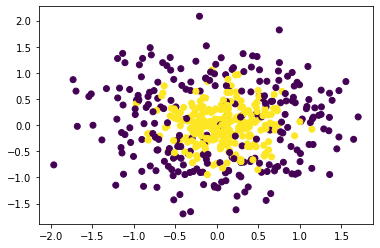

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()


np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))



0.786

In [21]:
abc.fit(X,y)

AdaBoostClassifier()

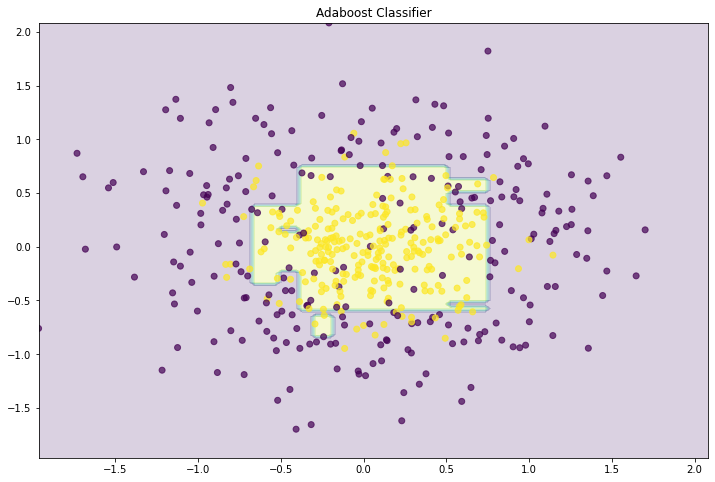

In [25]:
def plot_decision_regions(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(X.min(),X.max(),100)
    xx1,xx2 = np.meshgrid(x_range,x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=.7)
    plt.title('Adaboost Classifier')
    plt.show()

plot_decision_regions(abc)    

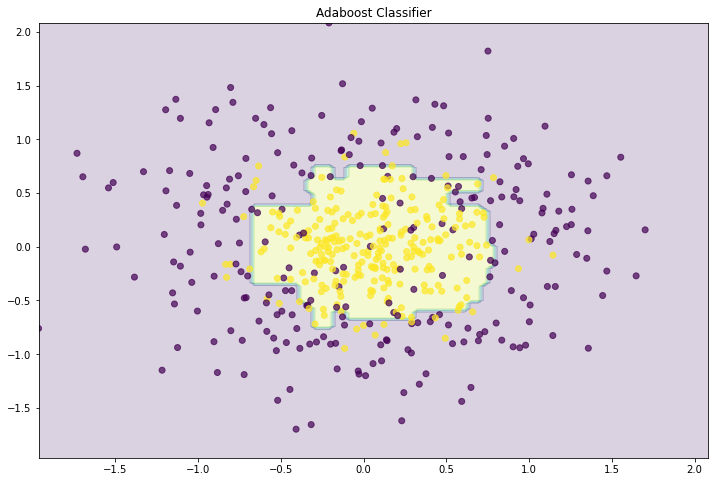

In [28]:
abc = AdaBoostClassifier(n_estimators=800,learning_rate=0.1)
abc.fit(X,y)
plot_decision_regions(abc)

## GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
grid['algorithm'] = ['SAMME','SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                           param_grid=grid,n_jobs=-1,cv=10)
grid_result = grid_search.fit(X,y)

#summarize the best score and configuration
print("Best Score:",(grid_result.best_score_,grid_result.best_params_))

Best Score: (0.8320000000000001, {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500})
